## Comparação KNN VS SVM utilizando validação cruzada

Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 

Baixando banco de dados

In [2]:
data = pd.read_csv('processamento_de_dados/resultado.csv')
del data['comprimento corpo']
del data['largura corpo']

#salvando labels
target = np.asarray(data['Tipo'])

del data['Tipo']

print(data.head())




   comprimento flagelo  largura flagelo  Volume corpo  Volume flagelo
0                  1.4              0.2     36.995395        0.043982
1                  4.2              1.5     41.704642        7.422013
2                  6.7              2.0     47.412916       21.048671
3                  1.5              0.2     50.029863        0.047124
4                  1.4              0.2     42.764930        0.043982


Separando amostra de treino e amostra de teste

In [3]:
#importando módulos do sklearn
from sklearn.model_selection import train_test_split

x=np.asarray(data);
y=target


Treinando modelo

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection



models=[]
results=[]
names=[]

#iniciando modelos
model1 = KNeighborsClassifier(10,'uniform')
model2 = SVC(kernel='rbf',gamma=0.1)

models.append( ['KNeighbors',model1] )
models.append(['SVC',model2])

Testando...

KNeighbors: 0.920000 (0.049889)
SVC: 0.913333 (0.066999)


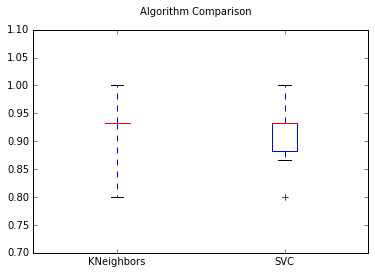

In [5]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=2)
    m_results= model_selection.cross_val_score(model,x,y,cv=kfold,scoring='accuracy')

    names.append(name)
    results.append(m_results)
    print("%s: %f (%f)" % (name, m_results.mean(), m_results.std()))
    
    fig = plt.figure()

    
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylim([0.7,1.1])
plt.show()
    

O gráfico de caixa lê se da seguinte maneira, a linha vermelha é a média do modelo. Os riscos superiores e inferiores os maiores e menores valores e a área da caixa é o alcance dos dados

##### Links
* https://en.wikipedia.org/wiki/Cross-validation_(statistics)
* https://machinelearningmastery.com/compare-models-and-select-the-best-using-the-caret-r-package/
* https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html